## Getting the Data

ACME Insurance has a Dataset with verified historical data consisting of information and medical charges incurred by over 1300 customers.


This Dataset will be used to create a Linear Regression Model

#### Importing Libraries
Lets import the necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
%matplotlib inline

### Retrieving the Data

Lets take the data and prepare it for use

We can check the number of rows and columns by calling the dataframe

In [2]:
medical_df = pd.read_csv("insurance.csv")
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

The dataset has 1338 rows(variables) and 7 columns(features). Each row contains the information for one customer

The objective of our model is to determine the value in the "charges" column based on the values in the other columns. If we can determine the historical values, we can estimate the charges for new customers too using the information in the other columns.

Lets check the data types of each column.

In [3]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The "Age", "Children", "BMI (body mass index)" and "Charges" columns have number values

"Sex", "Smoker" and "Region" are strings.

We do not have any null values in our columns.

Lets get the summary statistics (Mean, IQR, Max, Min, STD, Count) for our dataset using the .describe function

In [4]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

## Exploratory Data Analysis and Visualization

Lets do some EDA by visualizing the distribution of values in certain columns and relationship between the "Charges" and other columns

The following settings will improve the default style and font sizes for our charts

In [5]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Age

Age is a numeric column. The min age is 18 and max is 64. We can visualize the distribution using a histogram and a box plot.

We'll use plotly to make the chart interactive

In [6]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

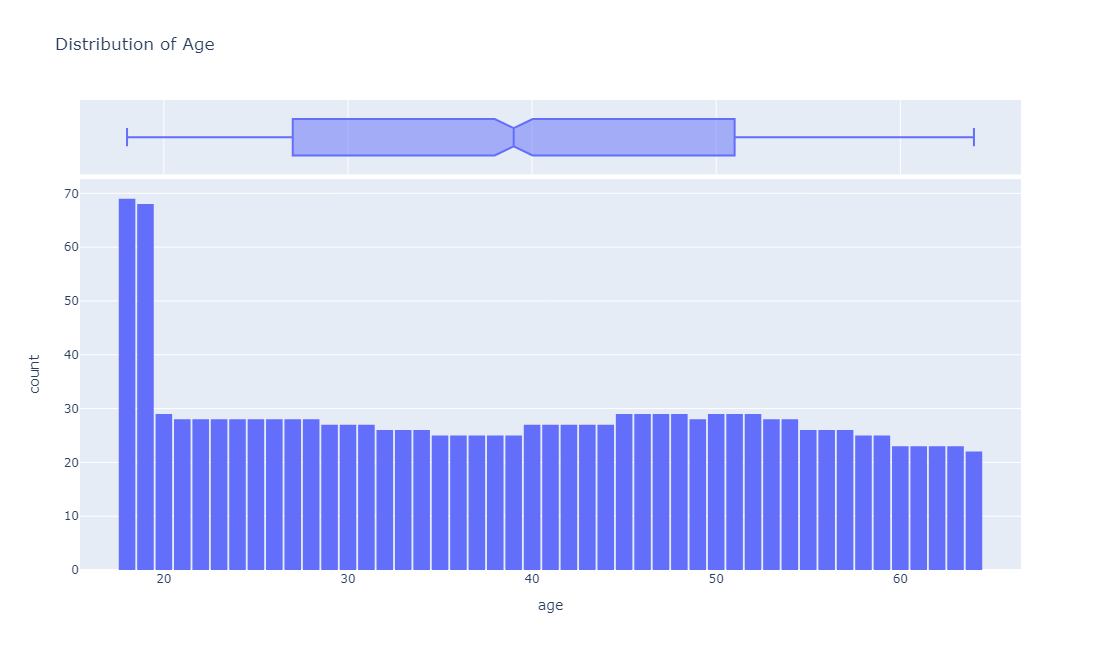

In [7]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal = 'box',
                   nbins = 47,
                   title = 'Distribution of Age')
fig.update_layout(width=800, height=650, bargap=0.1)
fig.show()

From the histogram, we notice that the distribution of the ages is almost uniform with about 20-30 customers at every age except for ages 18 and 19

## Body Mass Index

Lets look at the distribution of the BMI of customers.

In [8]:
medical_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

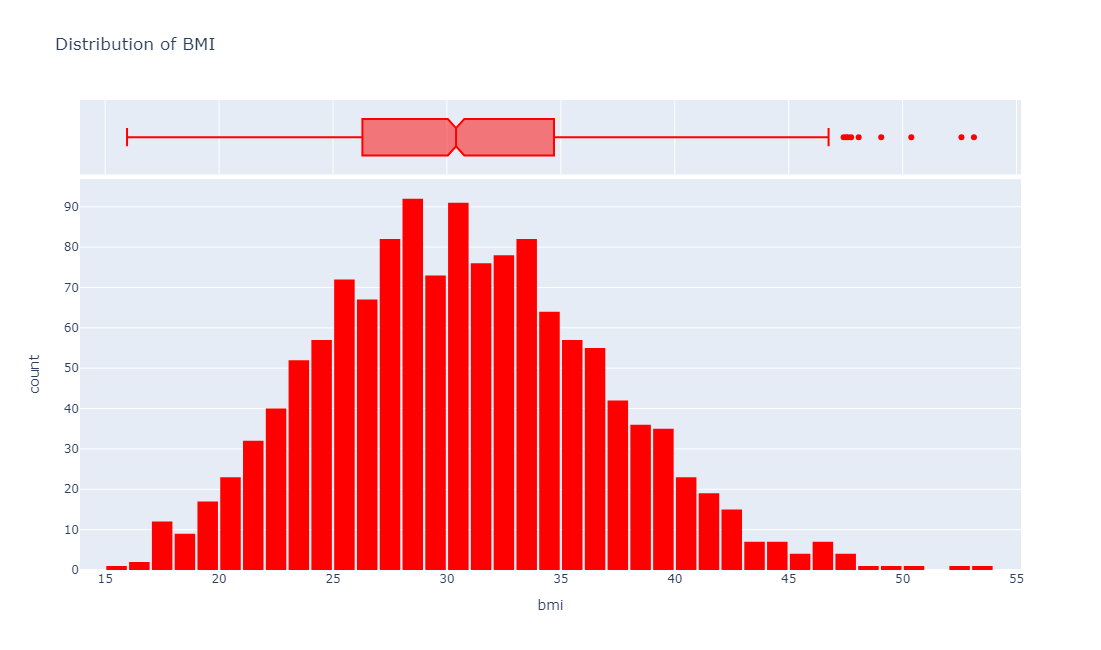

In [9]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal = 'box',
                   color_discrete_sequence = ['red'],
                   title = 'Distribution of BMI')
fig.update_layout(width=800, height=650, bargap=0.1)
fig.show()

The BMI Measurements form a Gaussian Distribution around the value 30

## Charges

Lets look at the distribution of the charges column which we are trying to predict.

We can distinguish between smoker and non-smoker using different colors

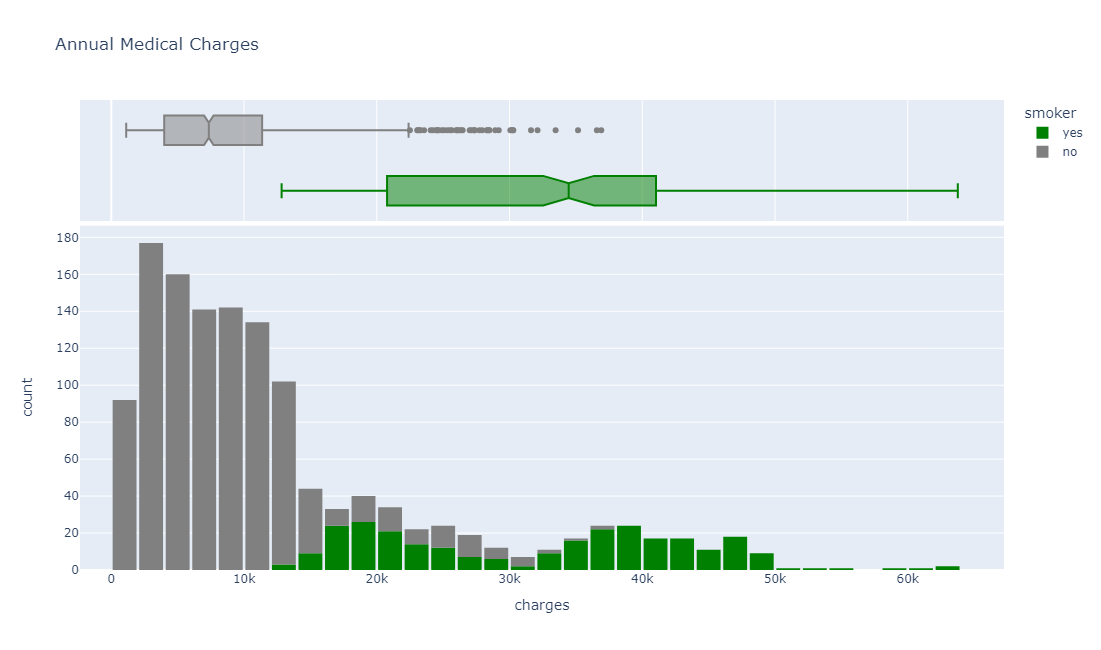

In [10]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal = 'box',
                   color = 'smoker',
                   color_discrete_sequence = ['green', 'grey'],
                   title= 'Annual Medical Charges')
fig.update_layout(width=800, height=650, bargap=0.1)
fig.show()
                

Generally, more people spend less than 10000 on annual medical charges.

It seems that people who smoke have higher median charges

## Relationships

Lets visualize the relationship between the "Charges" and other factors like "sex" etc.

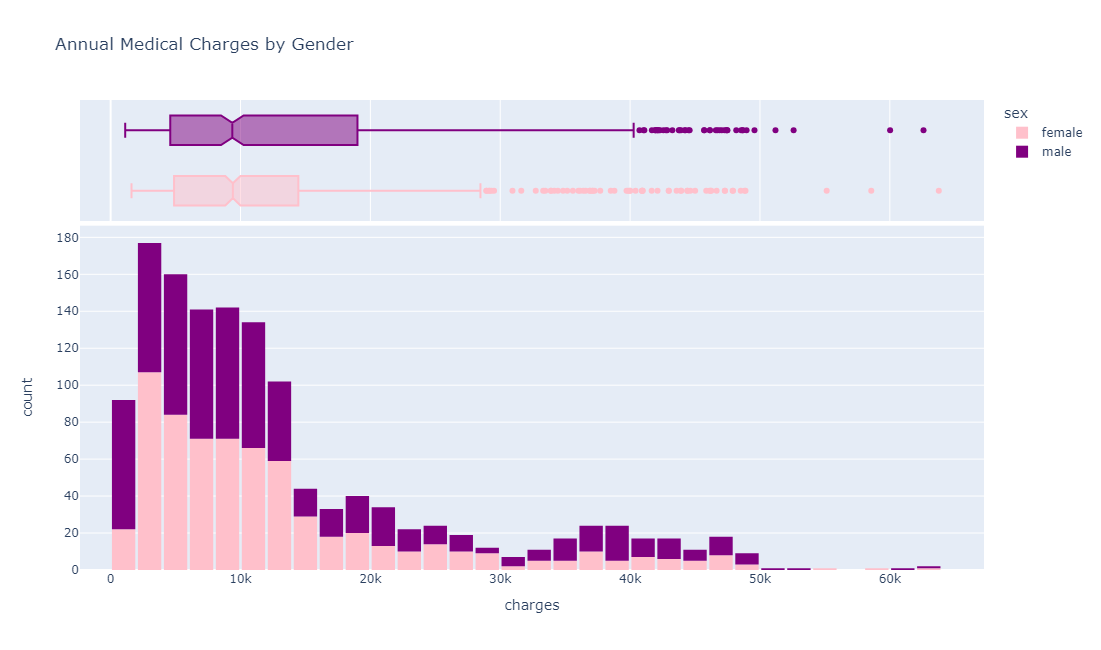

In [11]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal = 'box',
                   color = 'sex',
                   color_discrete_sequence = ['pink', 'purple'],
                   title= 'Annual Medical Charges by Gender')
fig.update_layout(width=800, height=650, bargap=0.1)
fig.show()

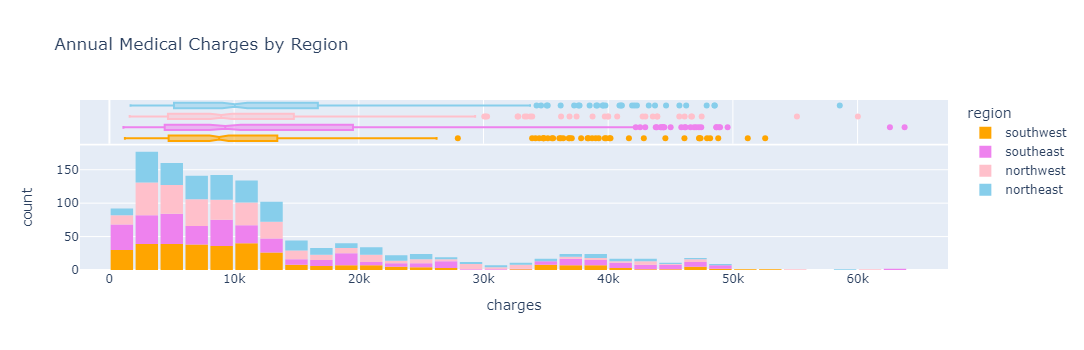

In [12]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal = 'box',
                   color = 'region',
                   color_discrete_sequence = ['orange', 'violet', 'pink', 'skyblue'],
                   title= 'Annual Medical Charges by Region')
fig.update_layout(width=700, height=350, bargap=0.1)
fig.show()

In [13]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

## We can Visualize the distribution of every single column

These columns include "smoker", "children", "sex"

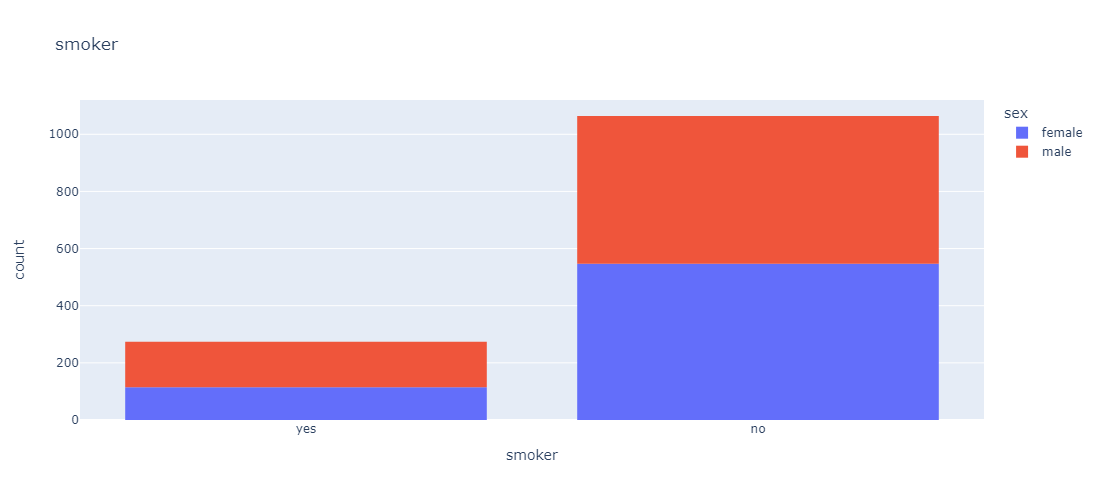

In [14]:
fig = px.histogram(medical_df, x='smoker', color='sex', title='smoker')
fig.update_layout(width=700, height=500)
fig.show()

Distribution of Gender

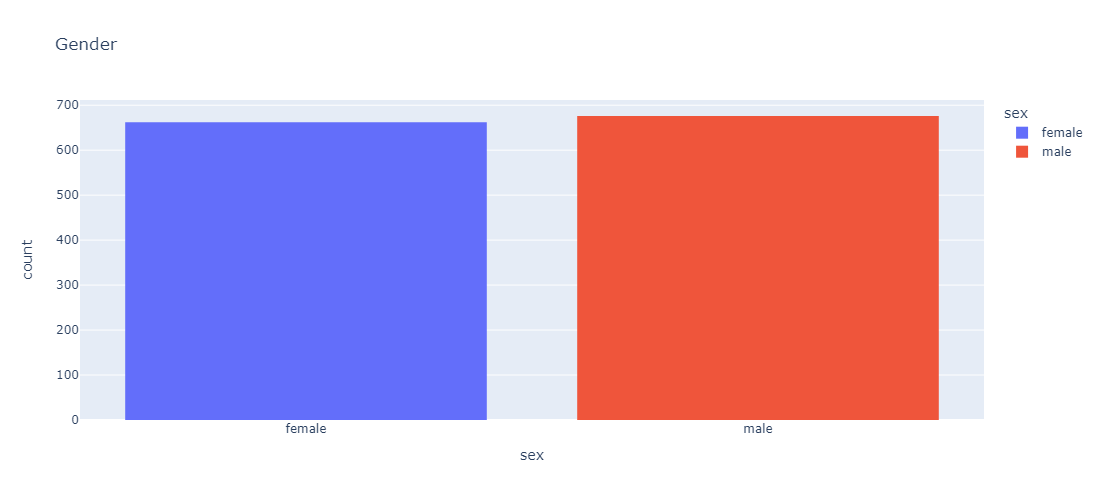

In [15]:
fig = px.histogram(medical_df, x='sex', color='sex', title='Gender')
fig.update_layout(width=700, height=500)
fig.show()

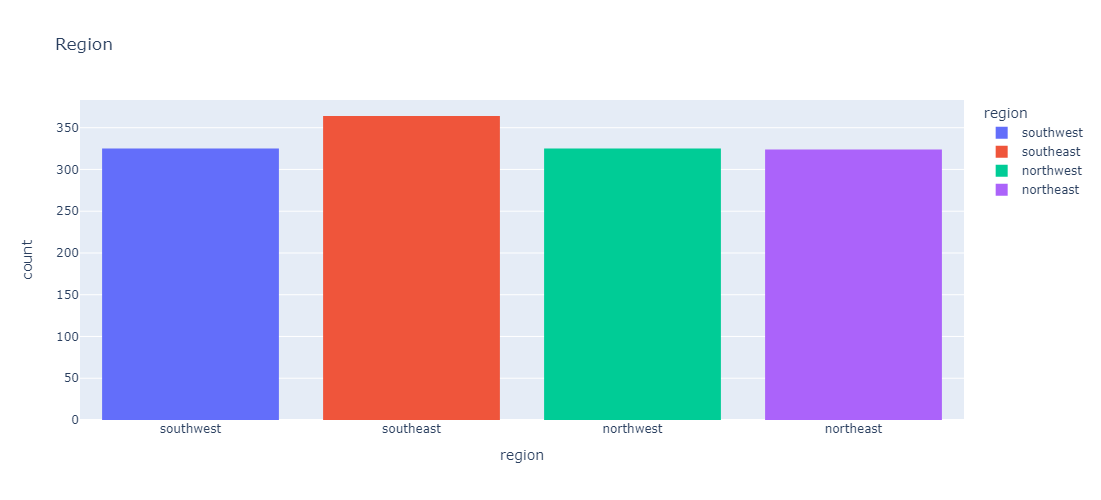

In [16]:
fig = px.histogram(medical_df, x='region', color='region', title='Region')
fig.update_layout(width=700, height=500)
fig.show()

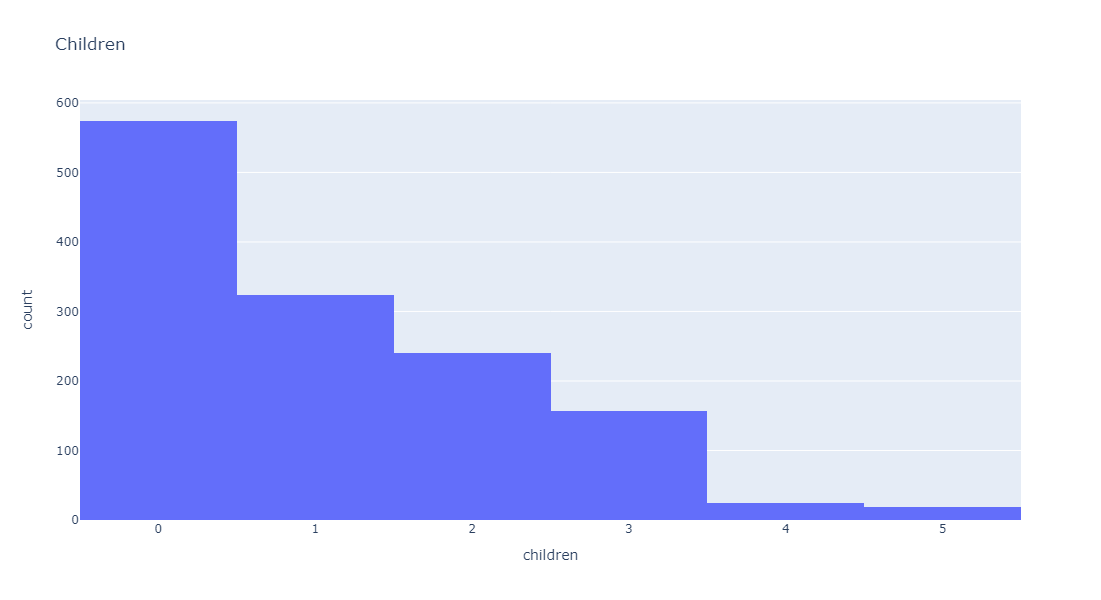

In [17]:
fig = px.histogram(medical_df, x='children', title='Children')
fig.update_layout(width=750, height=600)
fig.show()

## We can visualize the relationship between multiple columns

#### Age vs Charges

We will use a scatter plot to visualize the difference between "age" and "charges". Every point of the scatter plot represents a customer.

We can also use the smoker column to color the points

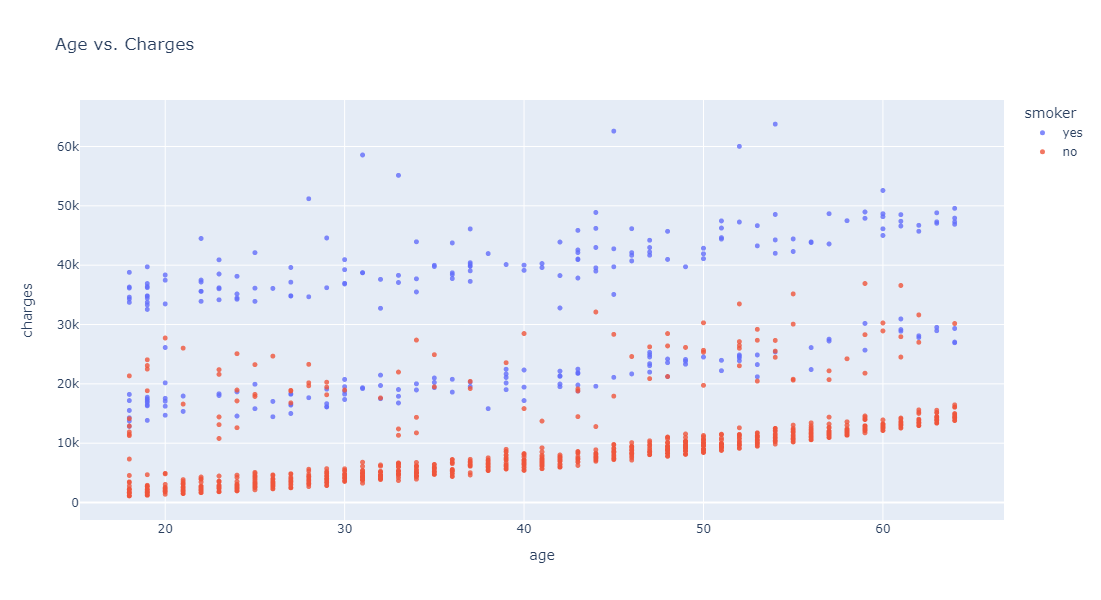

In [18]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.update_layout(width=750, height=600)
fig.show()

Observations from the chart above;

- The general trend seems to indicate that medical charges increase with age. There is however variations at every age and so we cannot overly rely on age to determine the medical charges
- The data forms three clusters forming a sloping line;
  1. The first lower cluster is presumably the "healthy non-smoker"
  2. The second mid cluster has both smokers and non-smokers. This could be an overlap between "non-smokers with health issues" or "smokers without major medical issues"
  3. The final upper cluster consists of exclusive smokers with issues potentially related to the smoking behaviour

### BMI and Charges

Lets plot a chart to compare BMI to Charges

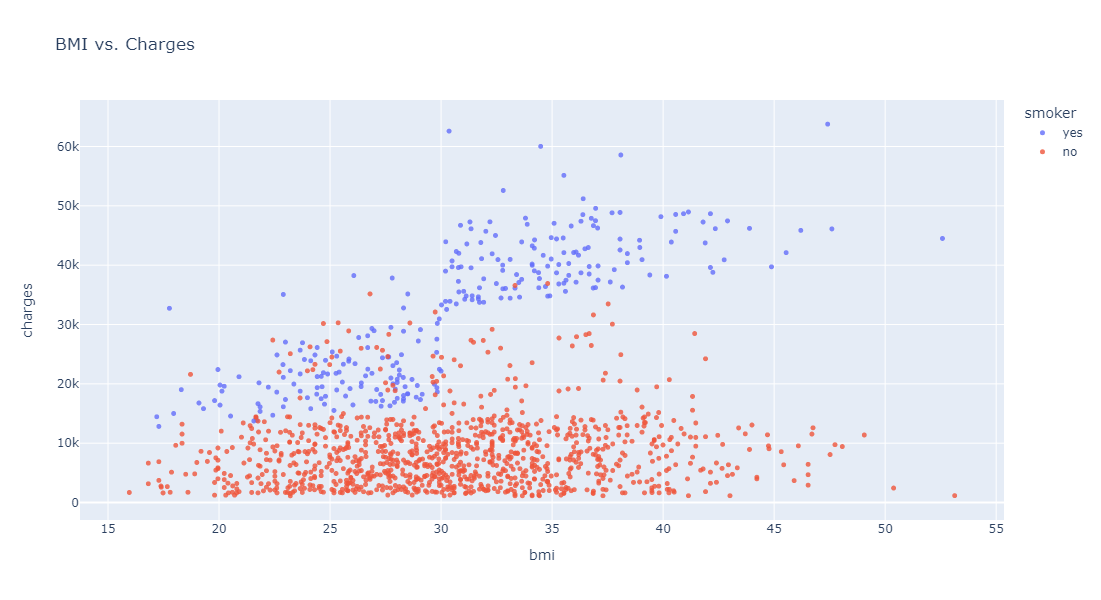

In [19]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.update_layout(width=750, height=600)
fig.show()

From the plot, it seems that an increase in BMI is not related to an increase in medical charges for non-smokers. But for smokers, there is a significant increase in charges for a BMI greater than 30.

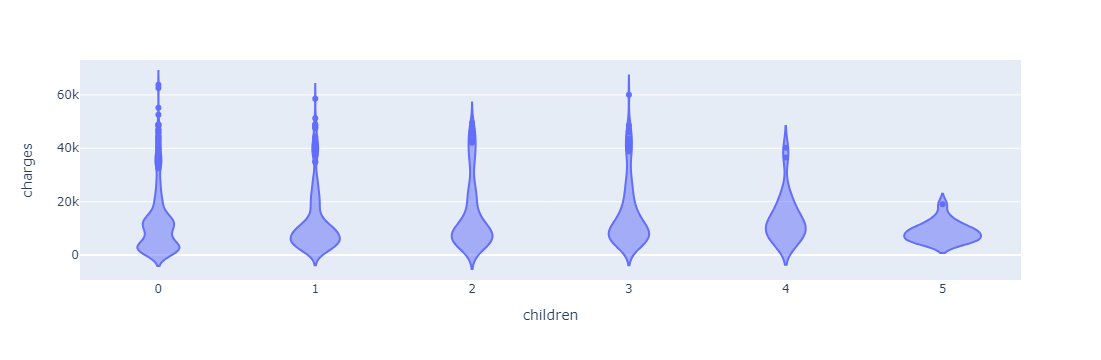

In [20]:
px.violin(medical_df, x='children', y='charges')

Text(0.5, 1.0, 'Distribution of Charges by Region')

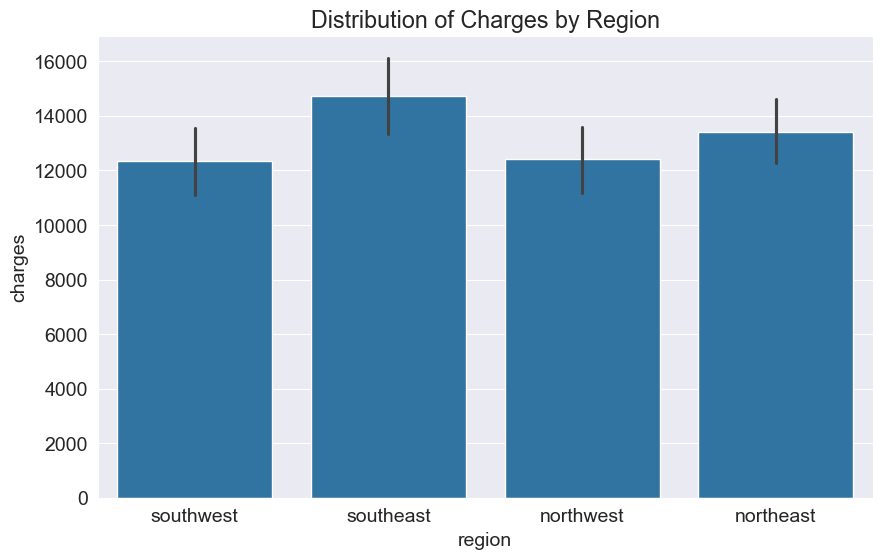

In [21]:
ax = sns.barplot(medical_df, x='region', y='charges')
ax.set_title('Distribution of Charges by Region') 

### Correlation

From the EDA, some columns are more closely related to the "charges" than others.

The relationship between different features can be measured using the _correlation coefficient_, which can be calculated using the .corr method

In [22]:
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [23]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [24]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

To calculate the correlation for categorical columns, they must first be converted into numeric columns

In [25]:
# The .map function is used to apply transformations to elements of an iterable
# In our case, we will transform categorical columns to numeric ones using the map function converting "yes" to 1 and "no" to 0
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

The correlation coefficient is interepreted as follows:
* Correlation ranges from -1 to 1 with 0 indicating no correlation, 1 means a positive correlation and -1 means a negative correlation
* The closer the corr is to the extremes 1 or -1, the stronger the relationship
* The signs indicate the **direction** of the correlation with values between 0 and 1 indicating a positive correlation
* Negative coefficients indicate an inverse relationship between variables

In [26]:
numerical_cols = medical_df.select_dtypes(include=[np.number])  # Select numerical columns
correlations = numerical_cols.corr()
correlations 

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

The result of .corr is a correlation matrix that can be visualized as a heatmap

Text(0.5, 1.0, 'Correlation Matrix')

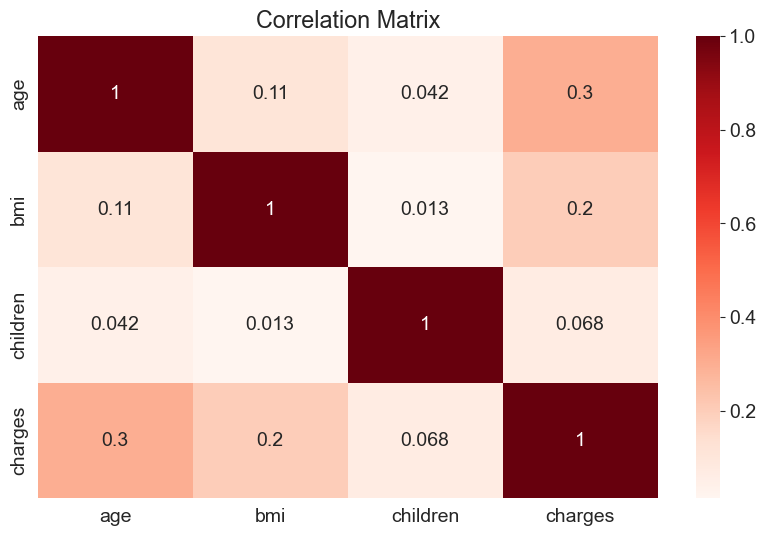

In [27]:
sns.heatmap(correlations, cmap='Reds', annot=True)
plt.title('Correlation Matrix')

Note that a high correlation between two variables does not necessarily indicate a cause-effect relationship between features. They could potentially be impacted by another factor. It's therefore to understand the underlying data to determine if indeed there is a correlation.

## Linear Regression using a Single Feature

We have noted that "age" and "smoker" have a significant correlation with "charges".

We can try to estimate the value in "charges" using the value of "age" for non-smokers.

Let's first create a Pandas dataframe for the data on non-smokers

In [28]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

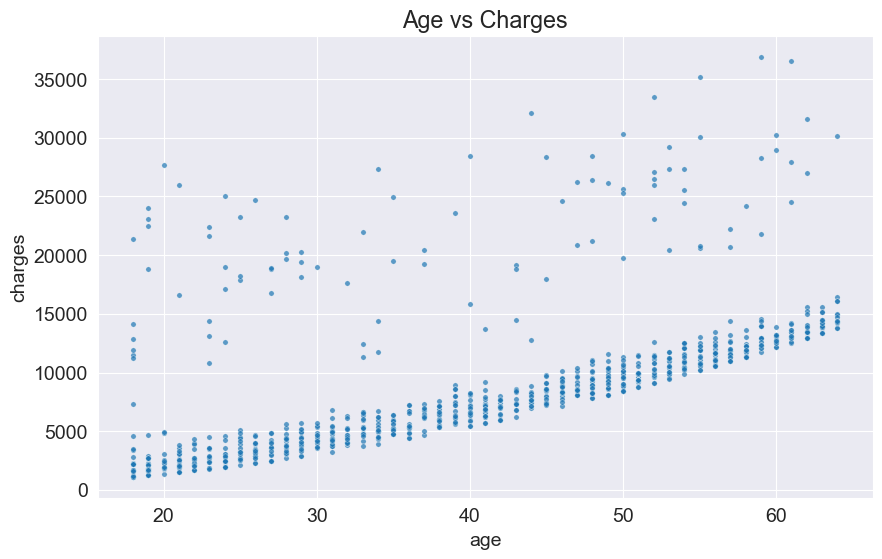

In [29]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

Apart from some exceptions, the points seem to form a line. We will try to fit a line using the above points and use this line to predict the "charges" based on "age".

This line will have the formula:
    y = mx + b
* m = slope
* b = intercept (value of y when x=0)

#### Model
We assume that the relationship between the "charges" and "age can be represented as below:
charges = m * age + b

* This is a **linear regression model** because it models the relationship between the "age" and "charges" as a straight line
* The values *m* and *b* are referred to as the **parameters/weights** of the model
* The "age" values are the **inputs** to the model and the values in the "charges" are the **targets**

We can create a helper function to calculate the charges given input(age) and parameters (m and b)

In [30]:
def estimate_charges(age, m, b):
    return m * age + b

The estimate_charges function is our very first model

Lets assign some random values to m and b

In [31]:
m = 50
b = 100

In [32]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [33]:
estimated_charges = estimate_charges(ages, m, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

Lets plot the estimated charges using a line graph

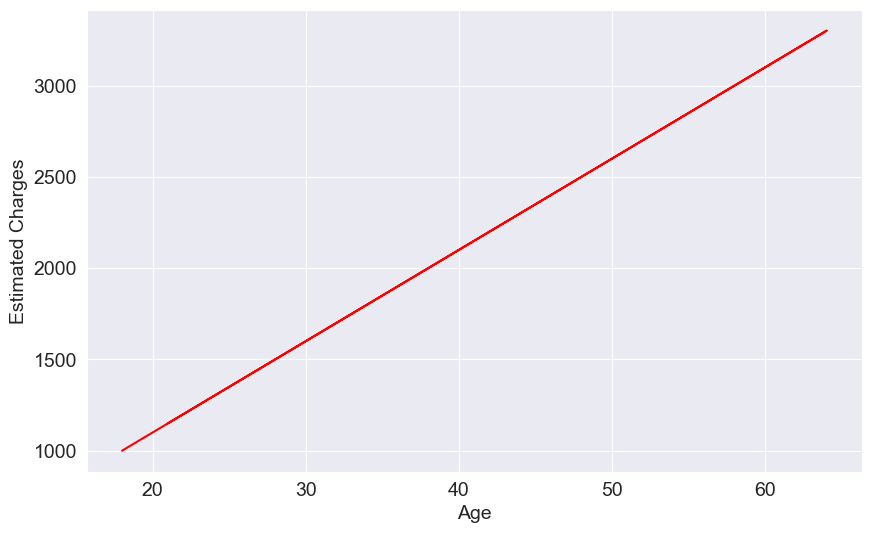

In [34]:
plt.plot(ages, estimated_charges, 'r-');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

We can fit this line on our data to see how well our model fits the data

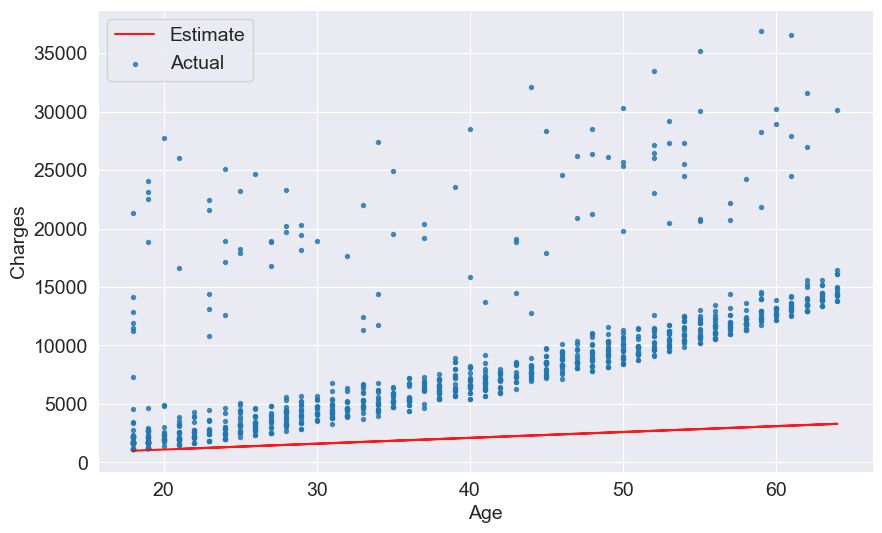

In [35]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimate', 'Actual'])

From the above plot, our model is clearly very inaccurate and does not fit the actual data. We can try different values of **m** and **b** to move the line around to get a better fit. 

Lets define a function that takes **m** and **b** as inputs and creates a plot

In [36]:
def try_parameters(m, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, m, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    

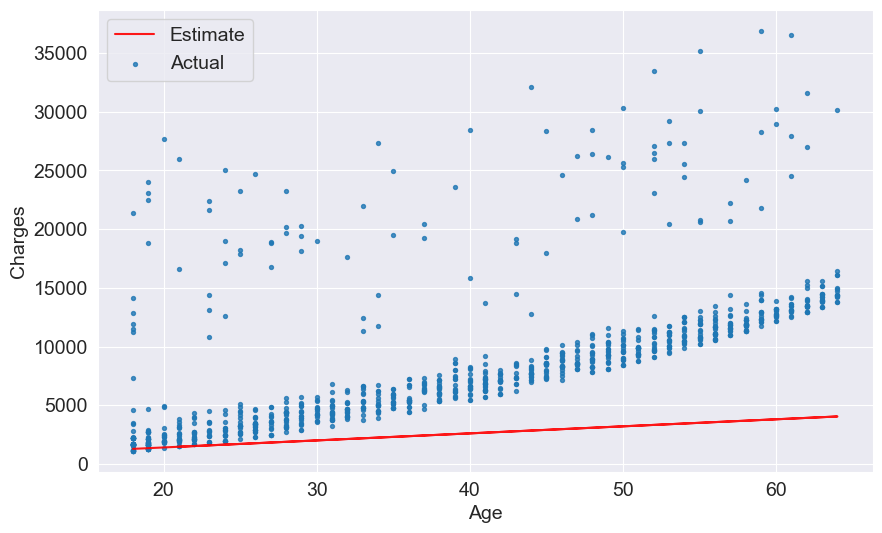

In [37]:
try_parameters(60, 200)

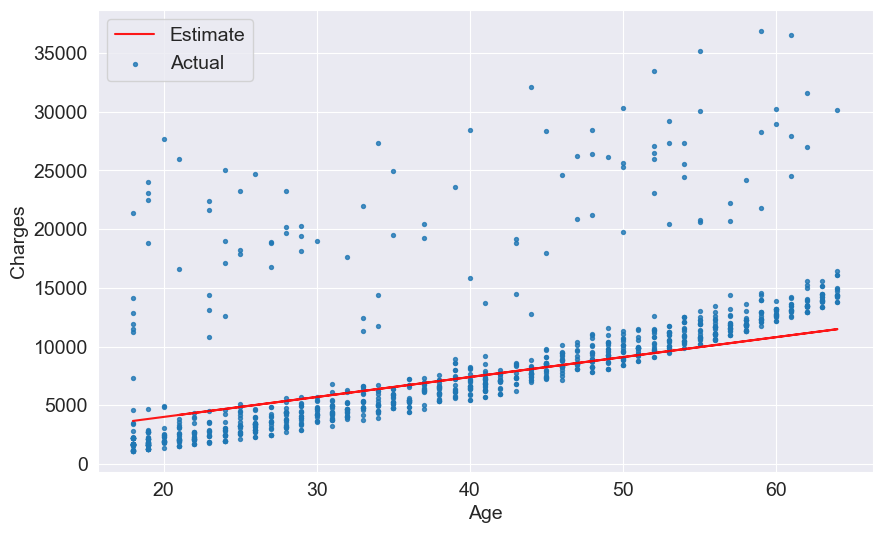

In [38]:
try_parameters(170, 600)

From the plots above, we note that a change in the parameters leads to a change in the slope of the line

In the above functions, we are manually trying different values of the slope(m) and intercept(b) and approximating the relationship between the "age" and "charges" columns

It would be nice if a computer could help us figure out the values of m and b and learn the relationships between the different features

To do this we need to:
* Measure numerically how well the line fits the points
* Modify m and b to improve fit


In [39]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [40]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

## Loss Function

We can compare the predictions of our model with the actual targets using the following method:
- Calculating the **residual** : the difference between the targets and the predictions
- **Squaring** the residuals to remove negative values
- Calculate the **average** of the elements in the resulting matrix
- Finding the square root of the avg

The result of the above steps will give us the **Root Mean Squared Error(RMSE)**

The RMSE can be respresented mathematically as follows:

<img src="https://i.imgur.com/WCanPkA.png" width="360">

The RMSE can be geometrically visualized as below:

<img src="https://miro.medium.com/v2/resize:fit:611/1*jopCO2kMEI84s6fiGKdXqg.png" width="360">

In [41]:
def rmse(targets,  predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

Lets try to calculate the RMSE using sample parameter values

In [42]:
m = 50
b = 100

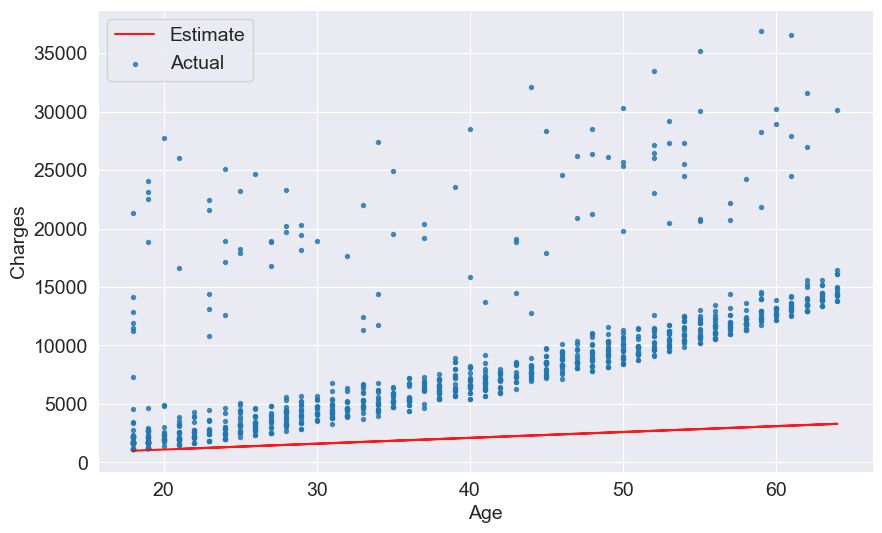

In [43]:
try_parameters(m, b)

In [44]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, m, b)

In [45]:
rmse(targets, predicted)

8461.949562575493

We can interpret the RMSE as follows: On average, each element in the prediction differs from the actual target by $8461

The result is called the *loss* because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model

Let's modify the try_parameters functions to also display the loss

In [46]:
def try_parameters(m, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, m, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)   
    

RMSE Loss:  8461.949562575493


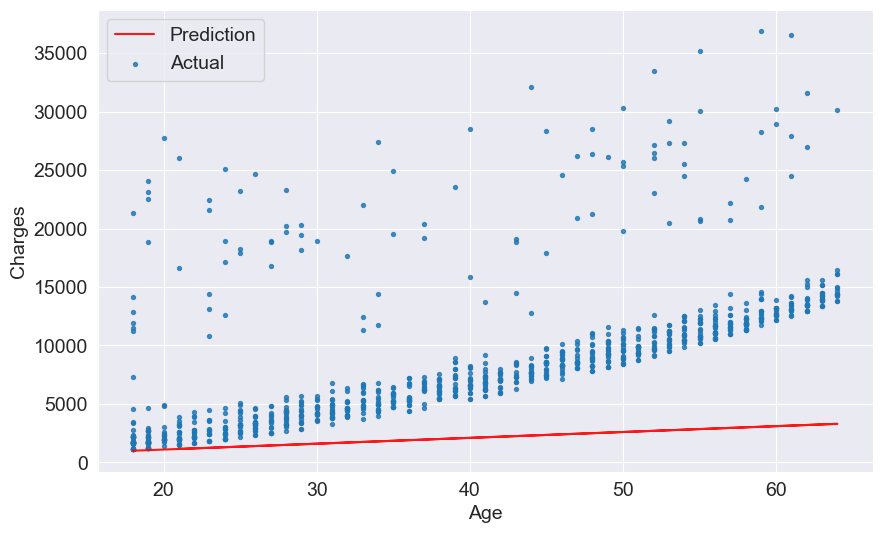

In [47]:
try_parameters(50, 100)

RMSE Loss:  4991.993804156943


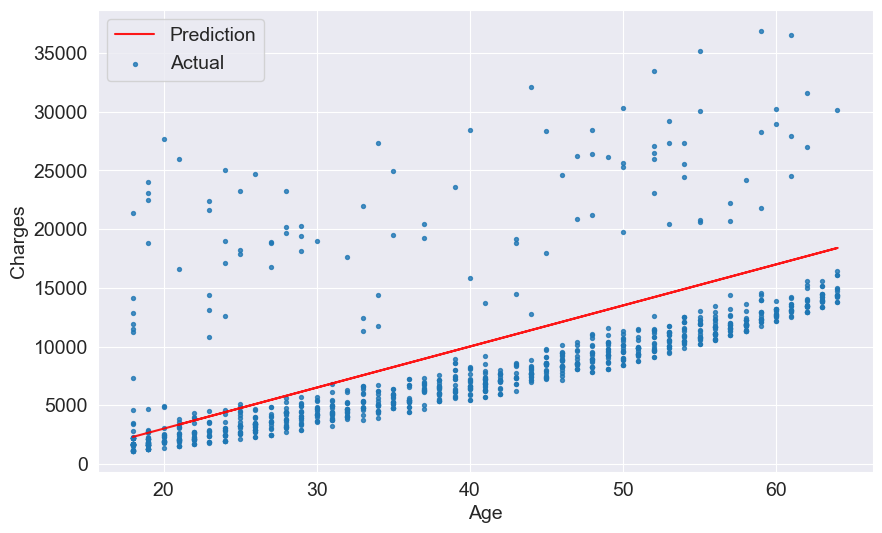

In [48]:
try_parameters(350, -4000)

### Optimizer

We need a way to adjust the parameters `m` and `b` to reduce the loss and improve the "fit" of the line

We hve two methods for adjusting the parameters:
- Ordinary Least Squares method: Uses matrix operations to compute the best parameter values (combines calculus & linear algebra)
- Stochastic Gradient Descent: Uses an iterative approach to calculate the parameters by slowly improving them using derivatives starting from a random value

## Linear Regression using SciKit-Learn

Rather than implementing a linear regression model by ourselves, we can use the `scikit-learn` library

We will use the `LinearRegression` class from `sklearn` to find the line of best fit between "age" and "charges" using the *Ordinary Least Squares Method* for optimization 

First we create a new **model object**

In [49]:
model = LinearRegression()

We can use the `fit` method of the model to find the line of best fit for the input and targets

In [50]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



**NB:** X must be a 2D Array, so we pass a dataframe instead of a single column

In [51]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape:', inputs.shape)
print('targets.shape:', targets.shape)

inputs.shape: (1064, 1)
targets.shape: (1064,)


In [52]:
type(inputs)

pandas.core.frame.DataFrame

Let's fit the model to the data

In [53]:
model.fit(inputs, targets)

LinearRegression()

We can make predictions using the created model. Let's try predicting the charges for the ages 23, 37 and 61

In [54]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

C:\Users\admin\miniconda3\envs\alxenv\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

The results of the model seem relevant

Lets compute the predictions for the entire set of inputs

In [55]:
predictions = model.predict(inputs)

In [56]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [57]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Lets compute the RMSE loss to evaluate the model

In [58]:
rmse(targets, predictions)

4662.505766636395

From the RMSE, it is clear that our predictions are off by an average of $4000, which is reasonable since we have outliers

The **parameters** of the model are stored in the `coef_` and `intercept_` properties

In [59]:
# m
model.coef_

array([267.24891283])

In [60]:
# b
model.intercept_

-2091.4205565650827

Lets visualize the line created by the above parameters

RMSE Loss:  4662.505766636395


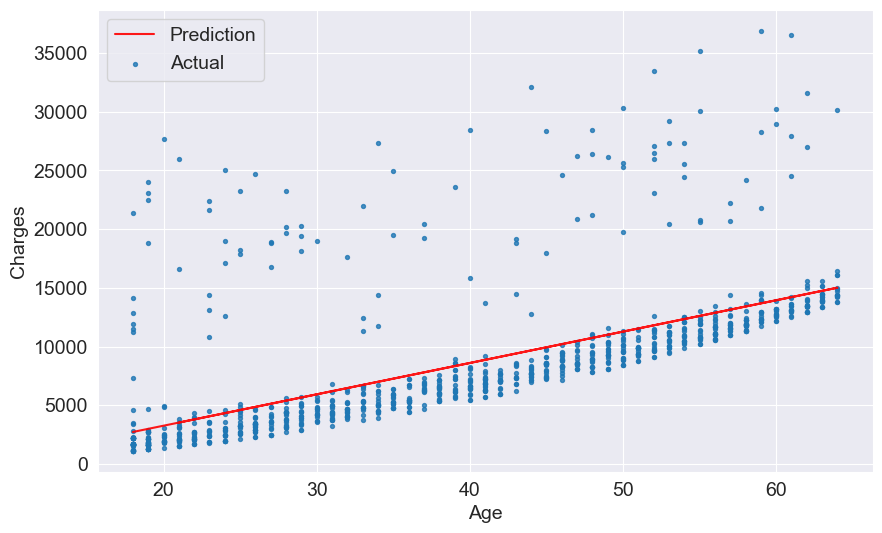

In [61]:
try_parameters(model.coef_, model.intercept_)

The line is close to the data points

It is slightly above the cluster of points because it is trying to account for the outliers

##### Stochastic Gradient Descent

Lets create a linear regression model that is trained using the stochastic gradient descent technique

We will use the **`SGDRegressor`** class from `SKlearn`

In [62]:
model_two = SGDRegressor()

In [63]:
help(model_two.fit)

Help on method fit in module sklearn.linear_model._stochastic_gradient:

fit(X, y, coef_init=None, intercept_init=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDRegressor instance
    Fit linear model with Stochastic Gradient Descent.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data.
    
    y : ndarray of shape (n_samples,)
        Target values.
    
    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.
    
    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.
    
    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).
    
    Returns
    -------
    self : object
        Fitted `SGDRegressor` estimator.



In [64]:
model_two.fit(inputs, targets)

SGDRegressor()

In [65]:
model_two.predict(np.array([[23],
                        [37],
                        [61]]))

C:\Users\admin\miniconda3\envs\alxenv\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([3940.2871713 , 6099.21741984, 9800.24070307])

In [66]:
stoch_predictions = model_two.predict(inputs)

In [67]:
stoch_predictions

array([3169.24065396, 4711.33368863, 5482.38020597, ..., 3169.24065396,
       3169.24065396, 3631.86856436])

In [68]:
rmse(targets, stoch_predictions)

5304.79987665297

In [69]:
# m
model_two.coef_

array([154.20930347])

In [70]:
# b
model_two.intercept_

array([393.47319154])

RMSE Loss:  5304.79987665297


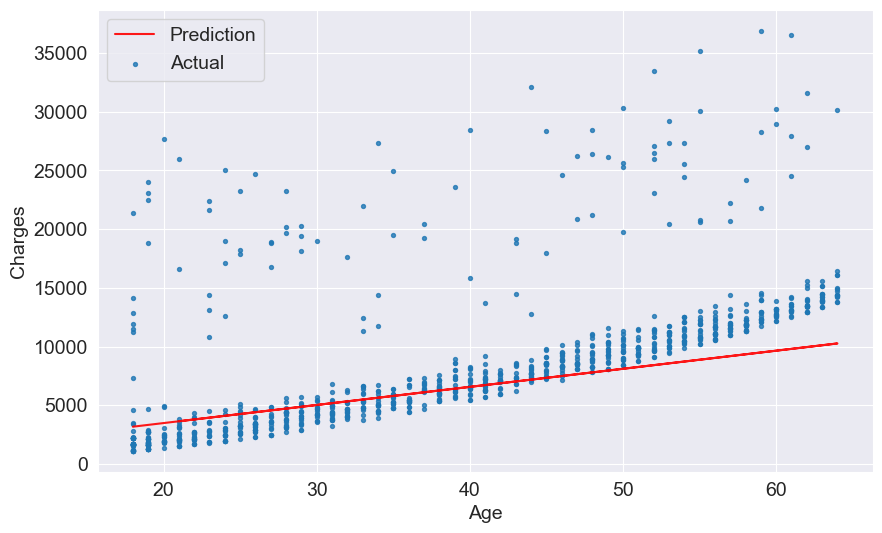

In [71]:
try_parameters(model_two.coef_, model_two.intercept_)

#### Linear Regression Model for Smokers

Lets now train a model to estimate the charges for smokers

In [72]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [73]:
smoker_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[274 rows x 7 columns]

Let us visualize the relationship between Age and Charges for Smokers

<Axes: title={'center': 'Age vs Charges(Smokers)'}, xlabel='age', ylabel='charges'>

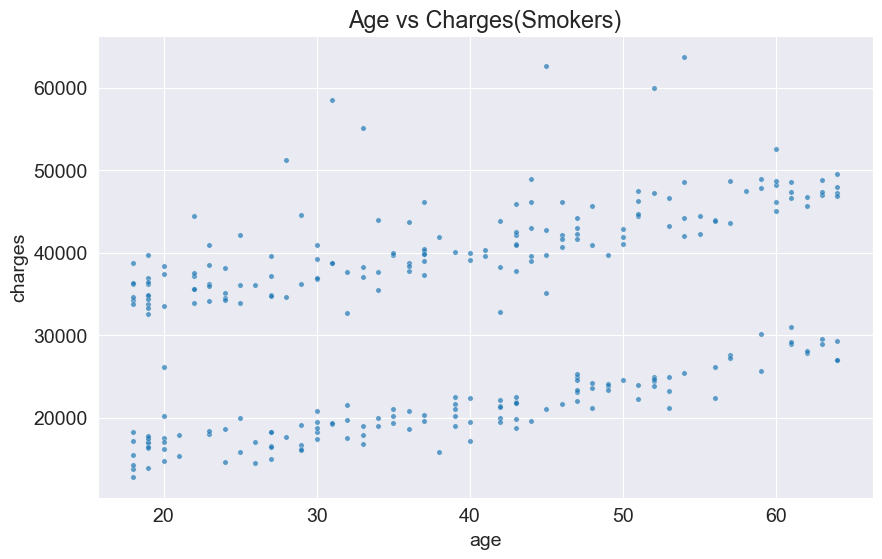

In [74]:
plt.title('Age vs Charges(Smokers)')
sns.scatterplot(data=smoker_df, x='age', y='charges', alpha=0.7, s=15)

In [75]:
smoker_ages = smoker_df.age
smoker_ages

0       19
11      62
14      27
19      30
23      34
        ..
1313    19
1314    30
1321    62
1323    42
1337    61
Name: age, Length: 274, dtype: int64

In [76]:
smoker_est_charges = estimate_charges(smoker_ages, m, b)
smoker_est_charges

0       1050
11      3200
14      1450
19      1600
23      1800
        ... 
1313    1050
1314    1600
1321    3200
1323    2200
1337    3150
Name: age, Length: 274, dtype: int64

Lets create a function to visualize the results for the smokers

In [77]:
def try_smoker_parameters(m, b):
    smoker_ages = smoker_df.age
    smoker_target = smoker_df.charges
    
    estimated_charges = estimate_charges(smoker_ages, m, b)
    
    plt.plot(smoker_ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(smoker_ages, smoker_target, s=8, alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    
    loss = rmse(smoker_target, estimated_charges)
    print("RMSE Loss: ", loss) 

RMSE Loss:  16159.375031795793


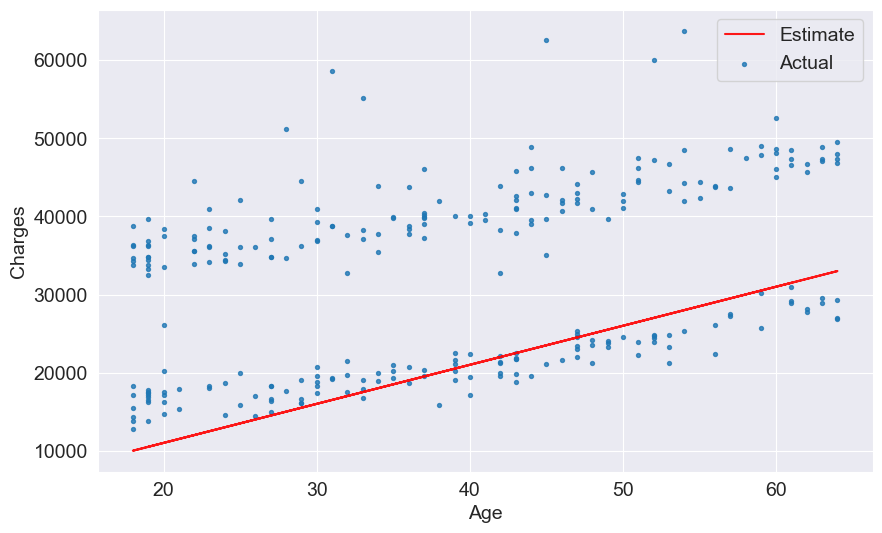

In [78]:
try_smoker_parameters(500, 1000)

In [79]:
smoker_inputs = smoker_df[['age']]
smoker_targets = smoker_df.charges
print('smoker inputs.shape:', smoker_inputs.shape)
print('smoker targets.shape:', smoker_targets.shape)

smoker inputs.shape: (274, 1)
smoker targets.shape: (274,)


In [80]:
smoker_model = model.fit(smoker_inputs, smoker_targets)

In [81]:
smoker_model

LinearRegression()

In [82]:
smoker_predictions = smoker_model.predict(smoker_inputs)

In [83]:
smoker_predictions

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [84]:
rmse(smoker_targets, smoker_predictions)

10711.00334810241

In [85]:
# smoker m
smoker_model.coef_

array([305.23760211])

In [86]:
# smoker b
smoker_model.intercept_

20294.128126915966

RMSE Loss:  10711.00334810241


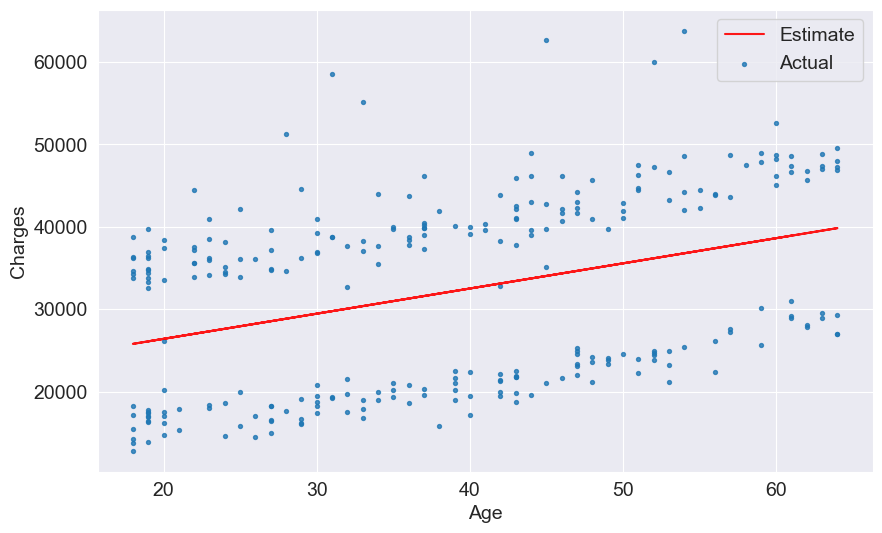

In [87]:
try_smoker_parameters(smoker_model.coef_, smoker_model.intercept_)

### Linear Regression using Multiple Features

We can use multiple features e.g "age" and "bmi" to predict the "charges"

We simply assume the following relationship:
* charges = w_1 * age + w_2 * bmi + b

In [88]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']
# Create and train the model
model = LinearRegression().fit(inputs, targets)
# Generate Predictions
predictions = model.predict(inputs)
# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.3128354612945


Adding BMI to the model does not really reduce the loss because of the weak correlation between BMI and Charges

In [89]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833272

In [90]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.138928704535422

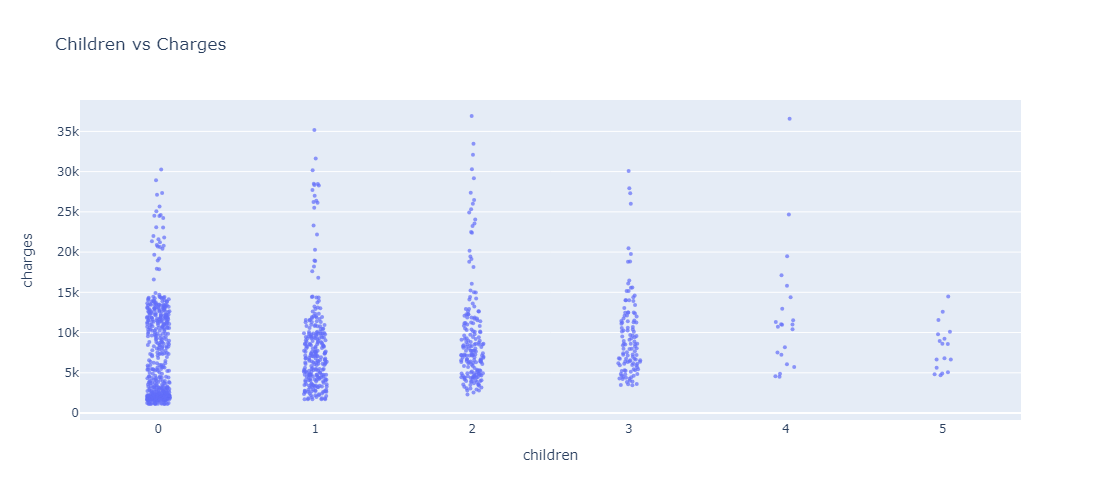

In [91]:
fig = px.strip(non_smoker_df, x='children', y='charges', title='Children vs Charges')
fig.update_traces(marker_size = 4, marker_opacity = 0.7)
fig.update_layout(width=700, height=500)
fig.show()

Using three features

In [92]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
# Create and train the model
model = LinearRegression().fit(inputs, targets)
# Generate Predictions
predictions = model.predict(inputs)
# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4608.470405038246


In [93]:
model.coef_

array([265.2938443 ,   5.27956313, 580.65965053])

In [94]:
model.intercept_

-2809.2976032235892

Lets create a model for the **smokers**

In [95]:
# Create inputs and targets
inputs, targets = smoker_df[['age', 'bmi', 'children']], smoker_df['charges']
# Create and train the model
model_smoker = LinearRegression().fit(inputs, targets)
# Generate Predictions
predictions = model_smoker.predict(inputs)
# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  5718.202480524154


In [96]:
model_smoker.coef_

array([ 264.93316919, 1438.72926245,  198.88027911])

In [97]:
model_smoker.intercept_

-22556.088196491593

Let's create a model for **all customers**

In [98]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']
# Create and train the model
model_all = LinearRegression().fit(inputs, targets)
# Generate Predictions
predictions = model_all.predict(inputs)
# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  11355.317901125973


In [99]:
model_all.coef_

array([239.99447429, 332.0833645 , 542.86465225])

In [100]:
model_all.intercept_

-6916.243347787033

### Linear Model using Categorical Features

To use categorical columns in our model, we need to convert them into numerical formats.

There are three techniques for doing this;
* If the categorical column has two categories (binary category), we replace their values with 0 and 1
* We can use **`one-hot encoding`** for categorical columns with more than two categories
* If the categories have a natural order (e.g. cold, neutral, warm, hot), we can convert them into numbers (e.g. 1, 2, 3, 4) preserving the order. These are called **ordinals**

### Binary Categories
The smoker category has two values: "yes" and "no". 

We can create a new column "smoker_code" with 0 for "no" and 1 for "yes"

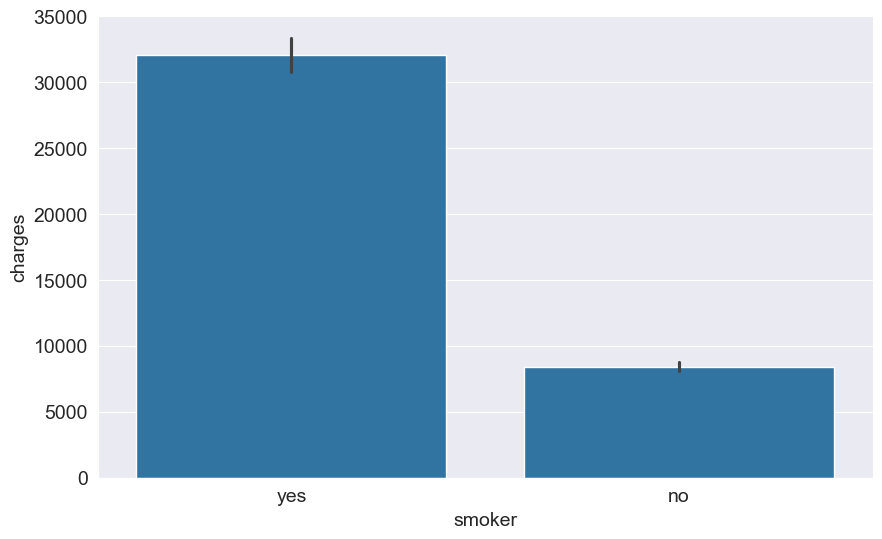

In [101]:
sns.barplot(medical_df, x='smoker', y='charges');

In [102]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
1333            0  
1334            0  
1335            0  
1336            0  
1337            1  

[1338 rows x 8 columns]

In [103]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984772

We can now use the **`smoker_code`** column for linear regression

***charges = w1 * age + w2 * bmi + w3 * children + w4 * smoker + b***

In [104]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']
# Create and train the model
model_full = LinearRegression().fit(inputs, targets)
# Generate Predictions
predictions = model_full.predict(inputs)
# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.439217188081


The loss reduces from `11355` to `6056` which signifies the importance of not ignoring the categorical data

Lets add the **sex** column as well

<Axes: xlabel='sex', ylabel='charges'>

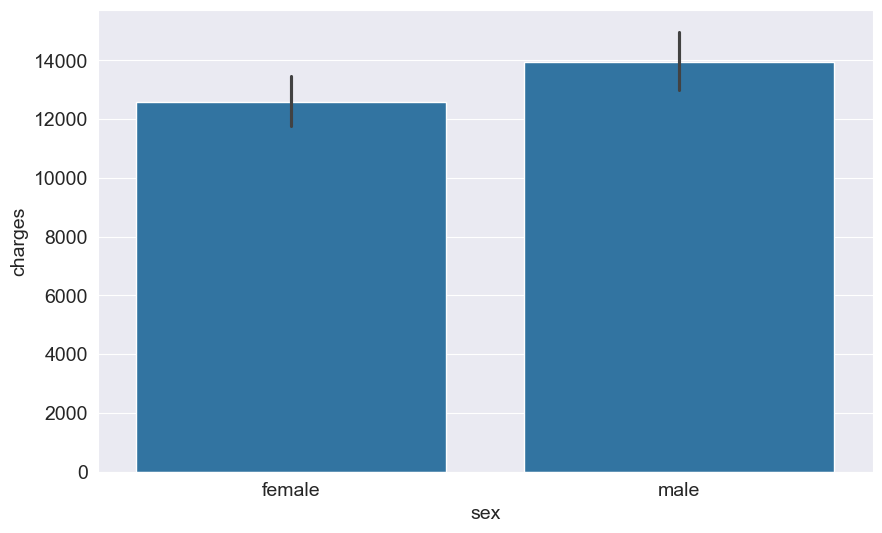

In [105]:
sns.barplot(medical_df, x='sex', y='charges')

In [106]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  
0               1         0  
1               0         1  
2               0         1  
3               0         1  
4               0         1  
...           ...       ...  
1333            0         1  
1334            0         0  
1335            0         0  
1336            0         0  
1337            1         0  

[1338 rows x 9 columns]

In [107]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025415

In [108]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']
# Create and train the model
model_whole = LinearRegression().fit(inputs, targets)
# Generate Predictions
predictions = model_whole.predict(inputs)
# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.100708754546


## One Hot Encoding

The "region" column has 4 values so we will use one hot encoding to create a new column for each region

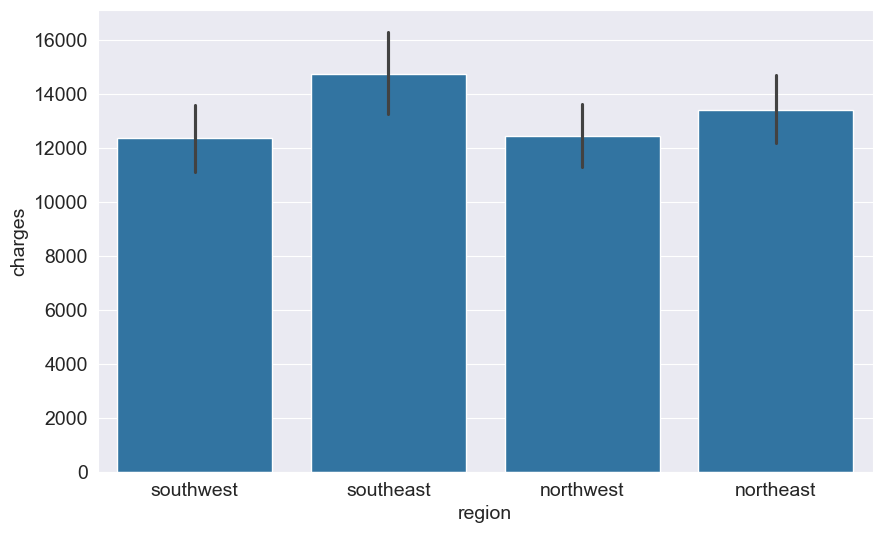

In [109]:
sns.barplot(medical_df, x='region', y='charges');

Let's use **onehotencoding** for the four regions

We can get the preprocessing library from `sklearn`

In [110]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [111]:
enc.transform([['northeast'],
               ['northwest']]).toarray()

C:\Users\admin\miniconda3\envs\alxenv\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [112]:
medical_df[['region']]

region
0     southwest
1     southeast
2     southeast
3     northwest
4     northwest
...         ...
1333  northwest
1334  northeast
1335  southeast
1336  southwest
1337  northwest

[1338 rows x 1 columns]

In [113]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

We can then add the one_hot_encoded keys to the dataframe

In [114]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  northeast  northwest  southeast  southwest  
0               1         0        0.0        0.0        0.0        1.0  
1               0         1        0.0        0.0        1.0        0.0  
2               0         1        0.0        0.0        1.0        0.0  
3               0         1        0.0        1.0        0.0        0.0  
4               0         1        0.0        1.0        0.0        0.0  
...           ...       ...        ...        ...        ...        ...  
1333            0         1        0.0        1.0        0.0        0.0  
1334            0         0        1.0        0.0        0.0        0.0  
1335            0         0        0.0        0.0        1.0        0.0  
1336            0         0        0.0        0.0        0.0        1.0  
1337            1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

We can now include the Region column in our linear regression model

The formula of our model will be as follows:

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

For our specific model, the formula is:

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times northeast + w_7 \times northwest + w_8 \times southeast + w_9 \times southwest + b$

In [133]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']], medical_df['charges']
# Create and train the model
model_e = LinearRegression().fit(inputs, targets)
# Generate Predictions
predictions = model_e.predict(inputs)
# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6041.6796511744515


In [116]:
medical_df.charges.corr(medical_df.northeast)

0.006348771280156069

## Model Improvements

Let's apply some improvements to our model

### Feature Scaling

We need to explain the rationale behind the predictions of our models

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times northeast + w_7 \times northwest + w_8 \times southeast + w_9 \times southwest + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights

In [118]:
model_e.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [119]:
model_e.intercept_

-12525.547811195462

In [134]:
medical_df[input_cols].loc[10]

age            25.00
bmi            26.22
children        0.00
smoker_code     0.00
sex_code        1.00
northeast       1.00
northwest       0.00
southeast       0.00
southwest       0.00
Name: 10, dtype: float64

In [137]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model_e.coef_, model_e.intercept_)
})
weights_df

feature        weight
0          age    256.856353
1          bmi    339.193454
2     children    475.500545
3  smoker_code  23848.534542
4     sex_code   -131.314359
5    northeast    587.009235
6    northwest    234.045336
7    southeast   -448.012814
8    southwest   -373.041756
9            1 -12525.547811